/home/kit/tm/lm6999/miniconda3/envs/new_env/lib/python3.10/site-packages/torch_geometric/typing.py:47: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: /lib64/libm.so.6: version `GLIBC_2.29' not found (required by /pfs/data5/home/kit/tm/lm6999/miniconda3/envs/new_env/lib/python3.10/site-packages/libpyg.so)
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "
/home/kit/tm/lm6999/miniconda3/envs/new_env/lib/python3.10/site-packages/torch_geometric/typing.py:101: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /lib64/libm.so.6: version `GLIBC_2.29' not found (required by /pfs/data5/home/kit/tm/lm6999/miniconda3/envs/new_env/lib/python3.10/site-packages/torch_sparse/_metis_cuda.so)
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


{
  "agent_id": "00000",
  "agent_dir": "./logs",
  "origin_path": "../Datasets/ERA_res250/",
  "debug": false,
  "bp": false,
  "batch": 256,
  "accumulation_steps": 2,
  "epoch": 10000,
  "test_batch": 25,
  "nn_lr": 1e-05,
  "es_mindelta": 0.5,
  "es_endure": 10,
  "num_features_in": 14,
  "num_features_out": 1,
  "emb_hidden_dim": 256,
  "emb_dim": 32,
  "k": 20,
  "conv_dim": 256,
  "seed": 1,
  "model": "PEGNN",
  "fold": 0,
  "holdout": [
    0
  ],
  "lowest_rank": 1,
  "hp_marker": "tuned",
  "coffer_slot": "./coffer/123456/",
  "tgt_op": "soil_temperature_level_1"
}
Working on multi-GPU [0, 1]
26292


/home/kit/tm/lm6999/miniconda3/envs/new_env/lib/python3.10/site-packages/osgeo/gdal.py:287: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


8764
8764
8764
DataParallel(
  (module): PEGCN(
    (spenc): GridCellSpatialRelationEncoder(
      (ffn): MultiLayerFeedForwardNN(
        (layers): ModuleList(
          (0): SingleFeedForwardNN(
            (dropout): Dropout(p=0.5, inplace=False)
            (act): ReLU()
            (linear): Linear(in_features=64, out_features=256, bias=True)
          )
        )
      )
    )
    (dec): Sequential(
      (0): Linear(in_features=256, out_features=128, bias=True)
      (1): Tanh()
      (2): Linear(in_features=128, out_features=64, bias=True)
      (3): Tanh()
      (4): Linear(in_features=64, out_features=32, bias=True)
    )
    (conv1): GCNConv(46, 256)
    (conv2): GCNConv(256, 256)
    (fc): Linear(in_features=256, out_features=1, bias=True)
  )
)

Training to 10000 epochs (256 of test batch size)
		-------- Loss: 1.2677863836288452 - real_iter_time: 0.16918635368347168
		Iter: 25, inter_train_loss: 35.98318386077881
		--------

		--------
		test_loss: 226220.40625, last best

/home/kit/tm/lm6999/miniconda3/envs/new_env/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/kit/tm/lm6999/miniconda3/envs/new_env/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


		-------- Loss: 1.0740867257118225 - real_iter_time: 0.20615863800048828
		Iter: 50, inter_train_loss: 31.521357119083405
		--------

		--------
		test_loss: 178989.1875, last best test_loss: 226220.40625
		--------

		--------
		r_squared: 0.6009934875631231, MSE: 12.81682
		--------



/home/kit/tm/lm6999/miniconda3/envs/new_env/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/kit/tm/lm6999/miniconda3/envs/new_env/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


		-------- Loss: 1.0002154111862183 - real_iter_time: 0.26052951812744147
		Iter: 75, inter_train_loss: 25.9323627948761
		--------

		--------
		test_loss: 156240.359375, last best test_loss: 178989.1875
		--------

		--------
		r_squared: 0.6447034973208703, MSE: 11.974669
		--------



/home/kit/tm/lm6999/miniconda3/envs/new_env/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/kit/tm/lm6999/miniconda3/envs/new_env/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


FileNotFoundError: [Errno 2] No such file or directory: './coffer/123456/0/test_75.png'

<Figure size 640x480 with 0 Axes>

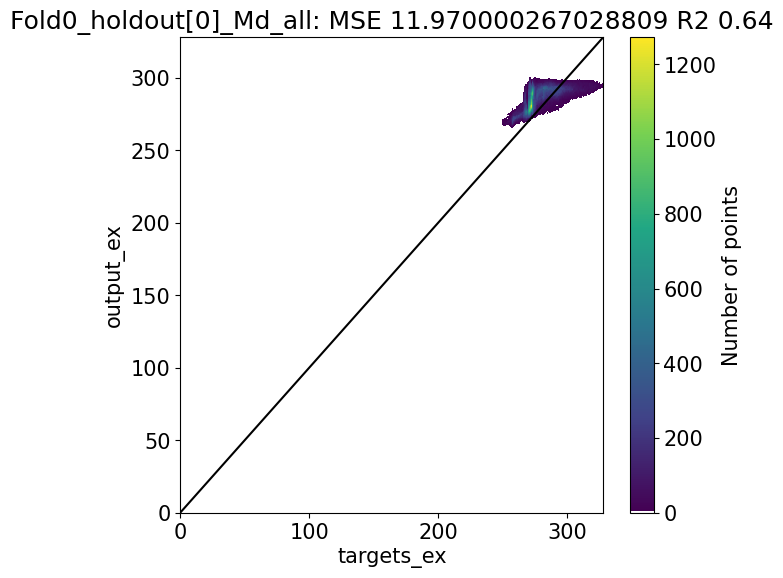

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.abspath(os.getcwd()), "PEGNN"))
import json
import time
import myconfig
import solver as solver
from datetime import datetime


def make_dir(path):
    try: 
        os.mkdir(path)
    except: 
        pass


def build_folder_and_clean(path):
    check = os.path.exists(path)
    if check:
        for root, dirs, files in os.walk(path, topdown=False):
            for name in files:
                os.remove(os.path.join(root, name))
            for name in dirs:
                os.rmdir(os.path.join(root, name))
    else:
        os.makedirs(path)
    

def train(job_id, settings):
    result_sheet = []
    list_total, list_err = solver.training(settings=settings, job_id=job_id)
    best_err, r_squared = solver.evaluate(settings=settings, job_id=job_id)
    result_sheet.append([list_total, list_err, best_err, r_squared])
    
    # collect wandb result into file
    rtn = {
        "best_err": sum(result_sheet[0][2])/len(result_sheet[0][2]), 
        "r_squared": sum(result_sheet[0][3])/len(result_sheet[0][3]), 
        "list_total_0": result_sheet[0][0],
        "list_err_0": result_sheet[0][1],
    }
    json_dump = json.dumps(rtn)
    with open(settings['agent_dir'] + f'/{job_id}.rtn', 'w') as fresult:
        fresult.write(json_dump)


if __name__ == '__main__':
    job_id = '123456'
    
    settings = {
        'agent_id': '00000',
        'agent_dir': './logs',
        'origin_path': '../Datasets/ERA_res250/',
        'debug': False,
        'bp': False,
        
        'batch': 256,
        'accumulation_steps': 512 // 256,
        'epoch': 10000,
        'test_batch': 25,
        'nn_lr': 1e-5,
        'es_mindelta': 0.5,
        'es_endure': 10,

        'num_features_in': 14,
        'num_features_out': 1,
        'emb_hidden_dim': 256,
        'emb_dim': 32,
        'k': 20,
        'conv_dim': 256,

        'seed': 1,
        'model': 'PEGNN',
        'fold': 0,
        'holdout': [0],
        'lowest_rank': 1,
        
        'hp_marker': 'tuned',
    }
    
    # build working folder
    dt_string = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
    coffer_slot = myconfig.coffer_path + str(job_id) + '/'
    build_folder_and_clean(coffer_slot)
    settings['coffer_slot'] = coffer_slot

    if 'Dataset_res250' in settings['origin_path'] or 'LUFT_res250' in settings['origin_path']:
        settings['tgt_op'] = 'mcpm10'
    elif 'ERA_res250' in settings['origin_path']:
        settings['tgt_op'] = 'soil_temperature_level_1'
    
    train(job_id, settings)
    